## SKENARIO 1

### Baseline Model

**Tujuan:**
Skenario 1 bertujuan untuk membangun **model baseline** sebagai pembanding untuk evaluasi skenario-skenario lain yang lebih kompleks.

### 1. Import Libraries
**Library yang Digunakan:**
- **Data Processing**: `pandas`, `numpy`
- **Visualization**: `matplotlib`, `seaborn`
- **Preprocessing**: `StandardScaler`, `LabelEncoder`, `train_test_split`
- **Evaluation**: `classification_report`, `confusion_matrix`, metrics
- **Traditional ML**: `LogisticRegression`, `SVC`, `RandomForestClassifier`, `XGBClassifier`, `CatBoostClassifier`
- **Deep Learning**: `MLPClassifier` (sklearn), `Sequential`, `SimpleRNN`, `Dense`, `Dropout` (Keras/TensorFlow)
- **Validation**: `StratifiedKFold`, `cross_val_score`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.utils import to_categorical


### 2. Load Gene Expression Data

Menggambil dataset gene expression RNA-Seq dari file CSV.

**Dataset**: 
- Struktur: 801 rows (samples) × 20,532 columns (1 ID + 20,531 genes)
- Setiap cell berisi nilai ekspresi gen untuk sampel tertentu

**Output**: DataFrame yang isinya 801 samples dan 20,531 fitur gen.

In [2]:
df = pd.read_csv("../data.csv")
data = df.drop(df.columns[0], axis=1) 
data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


### 3. Load Target Labels (Cancer Types)

Mengambil label kelas kanker untuk setiap sampel. Column: `Class` menghasilkan jenis kanker (BRCA, COAD, KIRC, LUAD, PRAD)

**Cancer Types:**
- BRCA: Breast Invasive Carcinoma (kanker payudara)
- COAD: Colon Adenocarcinoma (kanker usus besar)
- KIRC: Kidney Renal Clear Cell Carcinoma (kanker ginjal)
- LUAD: Lung Adenocarcinoma (kanker paru-paru)
- PRAD: Prostate Adenocarcinoma (kanker prostat)

In [ ]:
df_label = pd.read_csv("../labels.csv")
# target = df_label["Class"].unique()
target = df_label["Class"]
target

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object

1. BRCA – Breast Invasive Carcinoma
- Adalah kanker payudara invasif.
- Berasal dari sel epitel kelenjar/duktus pada jaringan payudara, yang sudah menembus (invasif) ke jaringan sekitarnya.
2. KIRC – Kidney Renal Clear Cell Carcinoma
- yaitu karsinoma sel jernih ginjal, subtipe utama dari renal cell carcinoma.
- Merupakan subtipe paling sering dari kanker ginjal pada dewasa, menyumbang mayoritas tumor ginjal ganas.
3. COAD – Colon Adenocarcinoma
- kanker yang timbul dari sel epitel kelenjar penghasil mukus di dinding usus besar (colon).
- Kanker saluran cerna yang sering dan agresif, dengan angka metastasis dan mortalitas yang cukup tinggi.
4. LUAD – Lung Adenocarcinoma
- Adenokarsinoma paru, subtipe utama dari non-small cell lung cancer (NSCLC).
- Subtipe paling sering dari kanker paru, termasuk pada perokok maupun non-perokok (terutama perempuan).
5. PRAD – Prostate Adenocarcinoma
- Adenokarsinoma prostat, subtipe histologis utama kanker prostat.
- Salah satu kanker paling sering pada pria di dunia, dan menjadi penyebab kematian yang signifikan, terutama bila sudah metastasis.

Menganalisis distribusi jumlah sampel untuk setiap kelas kanker.

**Analisis:**
- Visualisasi bar chart untuk melihat imbalance antar kelas
- BRCA kemungkinan menjadi kelas mayoritas (300 samples)
- Kelas lain lebih sedikit (50-150 samples)

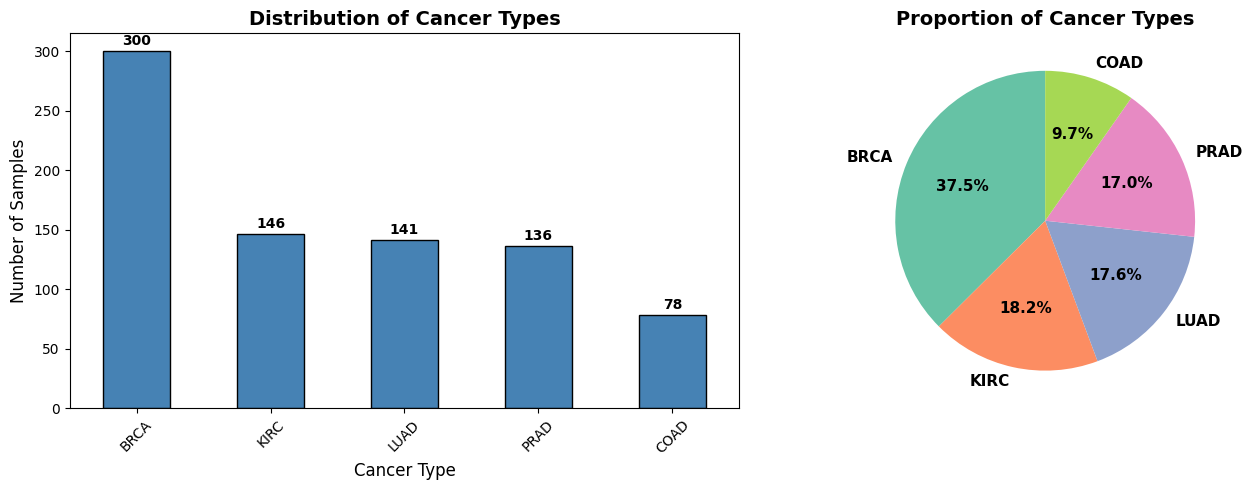

In [ ]:
class_counts = target.value_counts()
# Visualisasi class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Bar plot
class_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Distribution of Cancer Types',
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cancer Type', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(class_counts):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
colors = sns.color_palette('Set2', len(class_counts))
axes[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Proportion of Cancer Types', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('eda_1_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



### Missing Data Check
Memeriksa apakah ada missing values dalam dataset kami

In [ ]:
missing_data = data.isnull().sum().sum()
missing_labels = target.isnull().sum()

print(f"Missing values in features: {missing_data}")
print(f"Missing values in labels: {missing_labels}")

if missing_data == 0 and missing_labels == 0:
    print("Aman - No missing values")
else:
    print(
        f"Found {missing_data + missing_labels} missing values - Need preprocessing")

print(f"\nTipe Data Fitur:")
print(data.dtypes.value_counts())

Missing values in features: 0
Missing values in labels: 0
Aman - No missing values

Tipe Data Fitur:
float64    20531
Name: count, dtype: int64


### Statistical Summary of Gene Expression Data
Memahami karakteristik statistik dari ekspresi gen.


Overall statistics dari dataset genes:
Mean of means: 6.44
Mean of std: 1.11
Min value in dataset: 0.00
Max value in dataset: 20.78


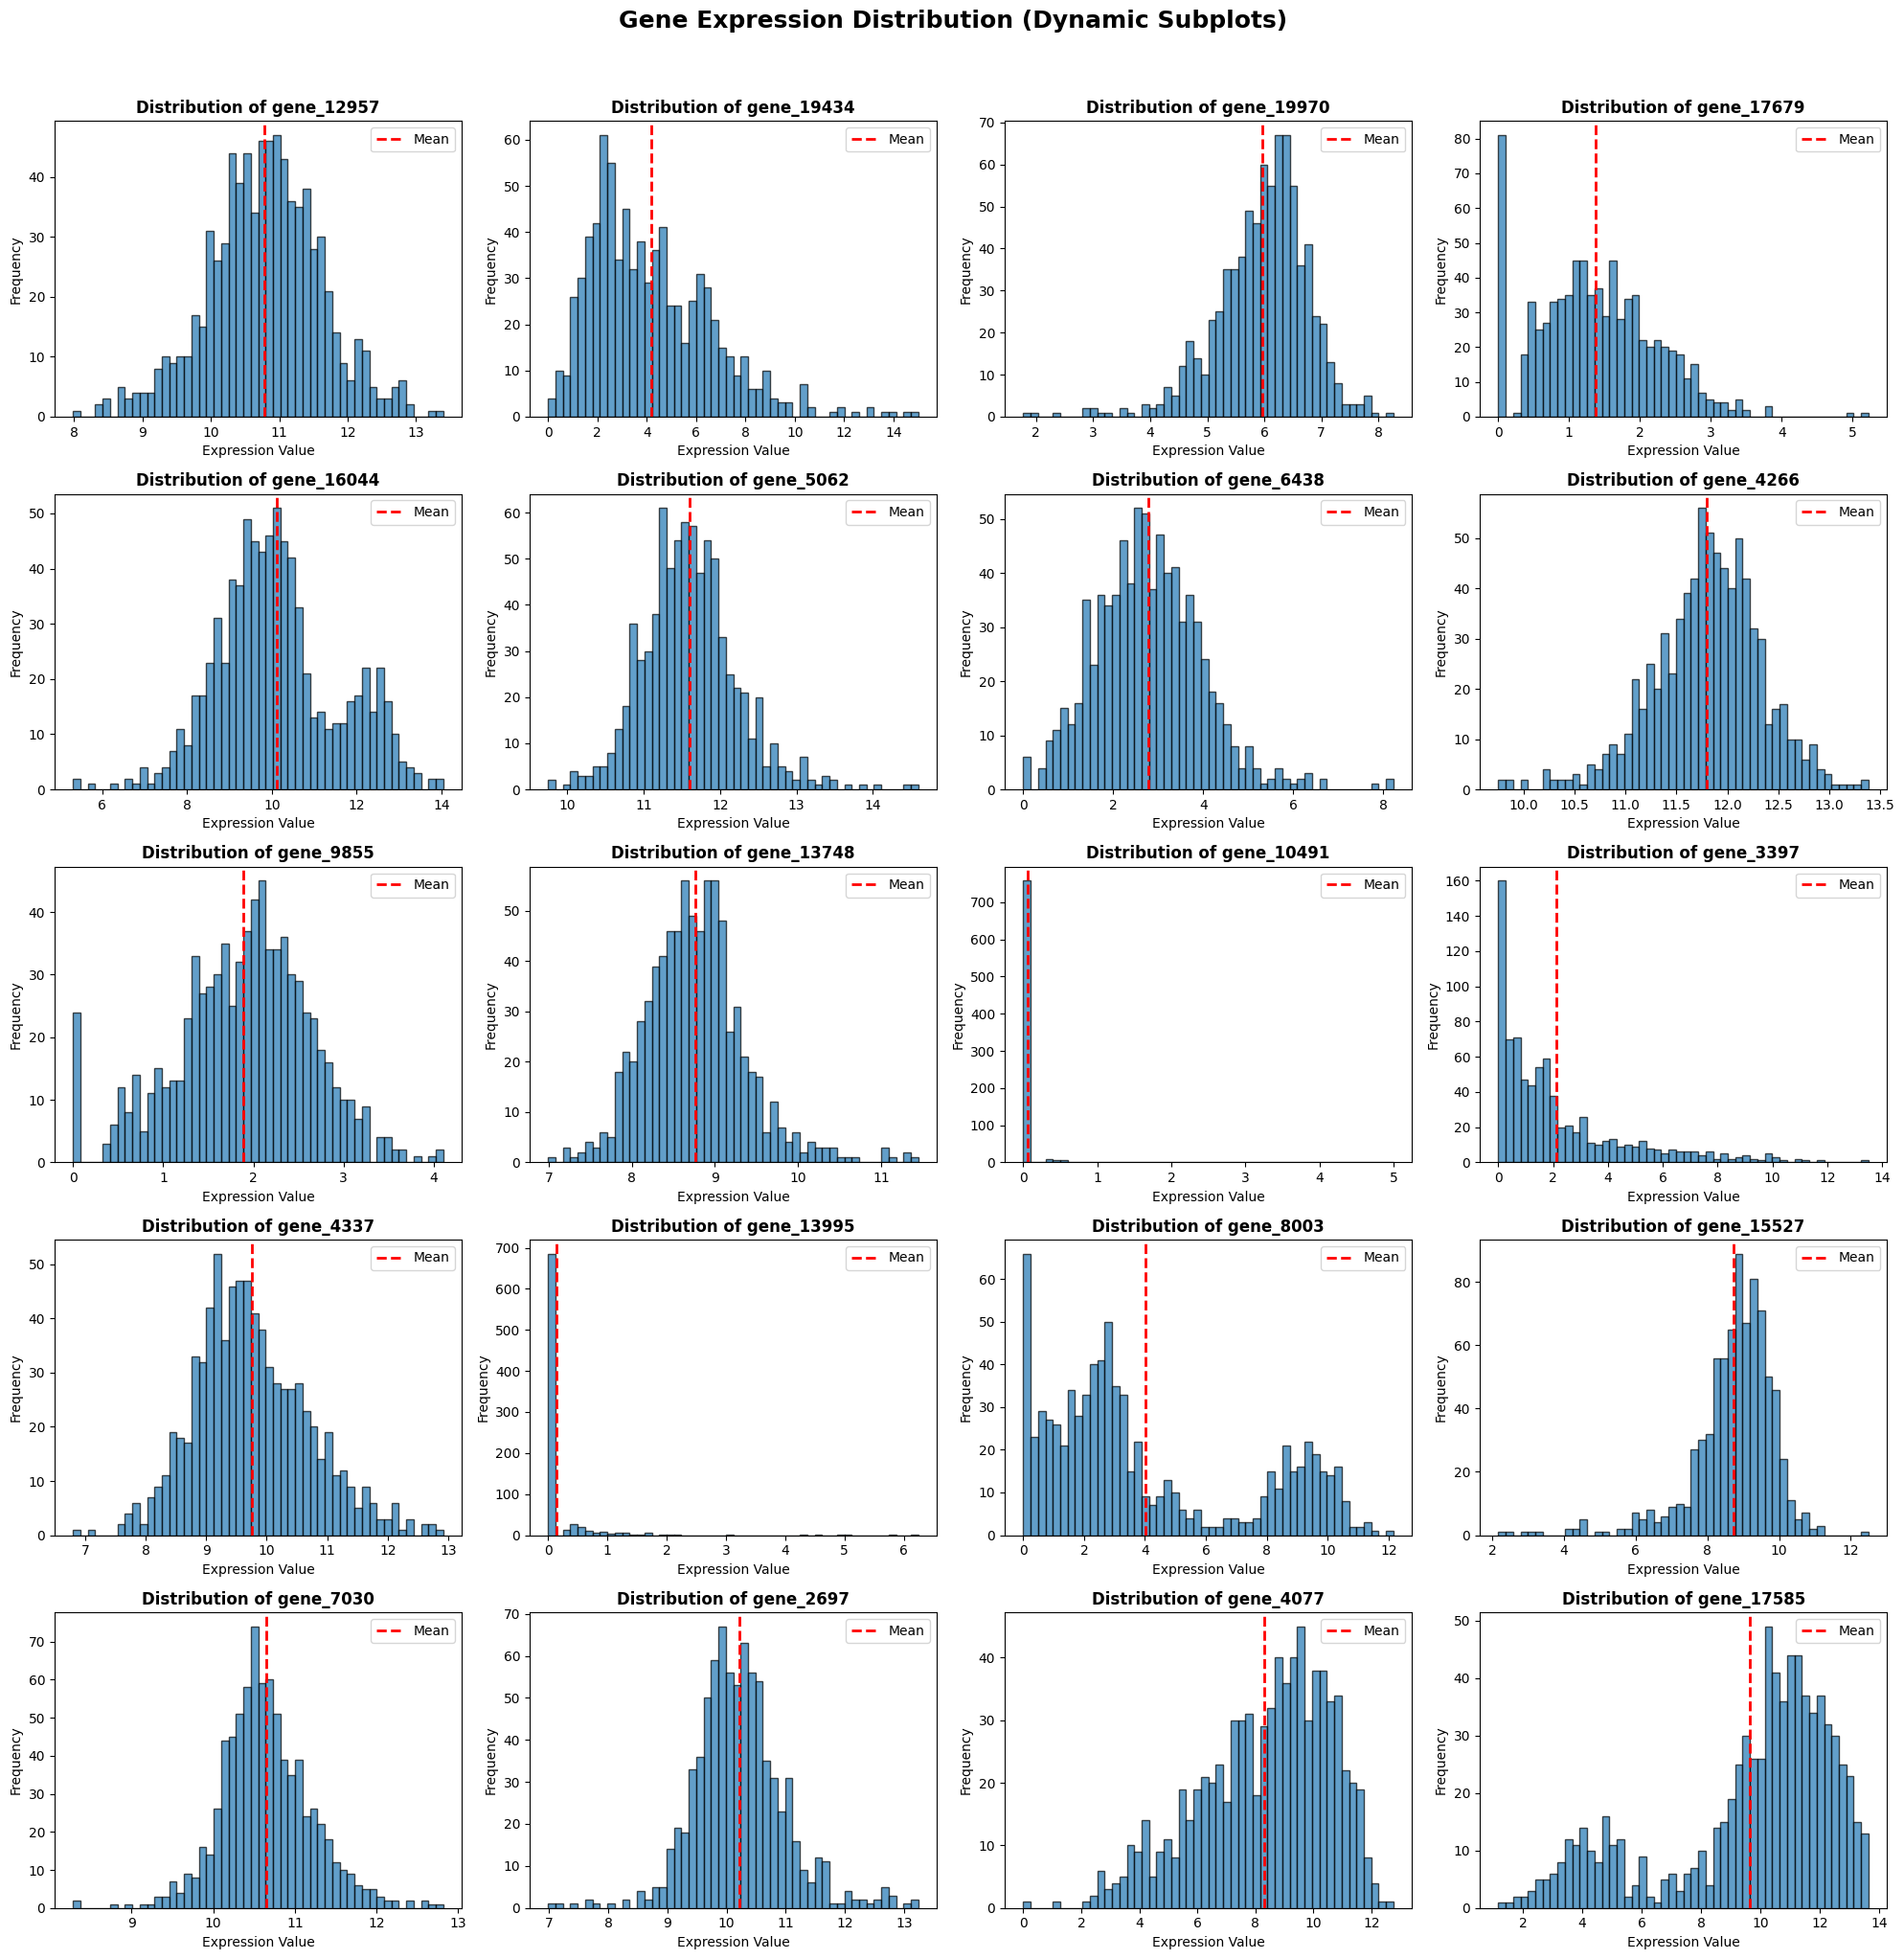

In [ ]:
stats_summary = data.describe().T

print("\nOverall statistics dari dataset genes:")
print(f"Mean of means: {stats_summary['mean'].mean():.2f}")
print(f"Mean of std: {stats_summary['std'].mean():.2f}")
print(f"Min value in dataset: {stats_summary['min'].min():.2f}")
print(f"Max value in dataset: {stats_summary['max'].max():.2f}")


num_genes = 20 
sample_genes = np.random.choice(data.columns, num_genes, replace=False)


cols = 4
rows = int(np.ceil(num_genes / cols)) 

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten() 

for idx, gene in enumerate(sample_genes):
    axes[idx].hist(data[gene], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f"Distribution of {gene}", fontweight='bold')
    axes[idx].set_xlabel("Expression Value")
    axes[idx].set_ylabel("Frequency")
    axes[idx].axvline(data[gene].mean(), color='red',
                      linestyle='--', linewidth=2, label='Mean')
    axes[idx].legend()

for j in range(num_genes, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Gene Expression Distribution (Dynamic Subplots)",
             fontsize=18, fontweight="bold", y=1.02)
plt.tight_layout()
plt.savefig("eda_dynamic_gene_distributions.png",
            dpi=300, bbox_inches='tight')
plt.show()

###  Variance Analysis & Feature Filtering
Filter gen dengan variance rendah (tidak informatif).
**Outputnya nanti:**
- Histogram distribusi variance
- Jumlah features setelah filtering (scenario 2)

Genes with zero variance: 267
Genes with very low variance (<0.01): 564
Mean variance: 1.76
Max variance: 44.76


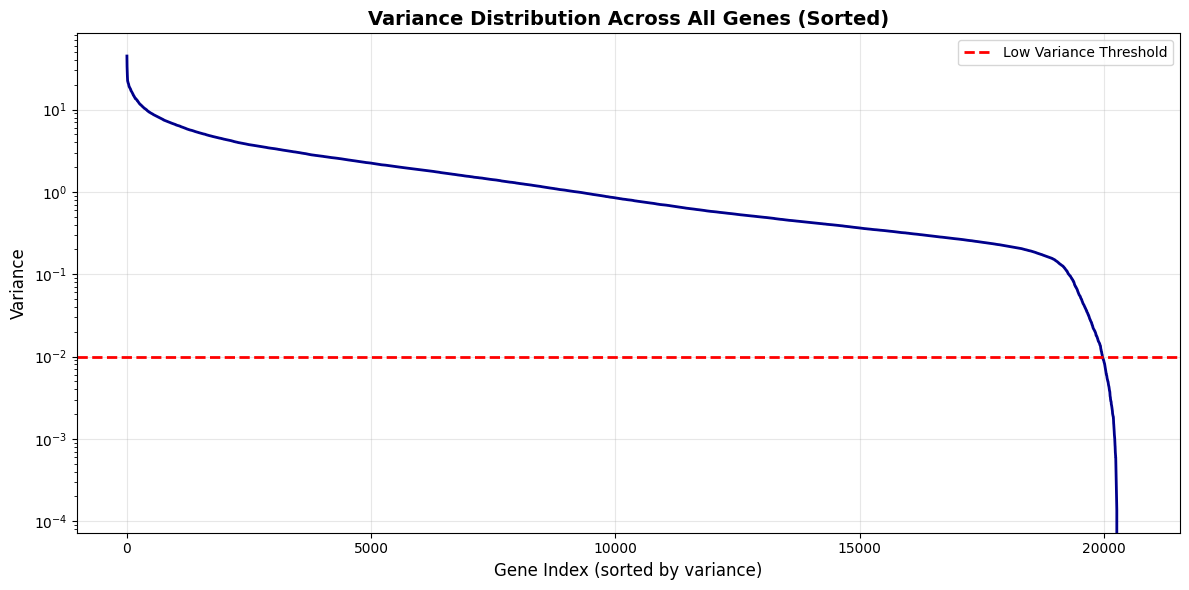

In [ ]:
variances = data.var()
zero_var_genes = (variances == 0).sum()
low_var_genes = (variances < 0.01).sum()

print(f"Genes with zero variance: {zero_var_genes}")
print(f"Genes with very low variance (<0.01): {low_var_genes}")
print(f"Mean variance: {variances.mean():.2f}")
print(f"Max variance: {variances.max():.2f}")

fig, ax = plt.subplots(figsize=(12, 6))
sorted_var = np.sort(variances)[::-1]
ax.plot(sorted_var, linewidth=2, color='darkblue')
ax.set_xlabel('Gene Index (sorted by variance)', fontsize=12)
ax.set_ylabel('Variance', fontsize=12)
ax.set_title('Variance Distribution Across All Genes (Sorted)',
             fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.grid(True, alpha=0.3)
ax.axhline(y=0.01, color='red', linestyle='--',
           linewidth=2, label='Low Variance Threshold')
ax.legend()

plt.tight_layout()
plt.savefig('eda_4_variance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

###  Correlation Matrix Analysis (Sample)

Melakukan Analisis korelasi antar gen (sample 50 gen pertama untuk visualisasi).


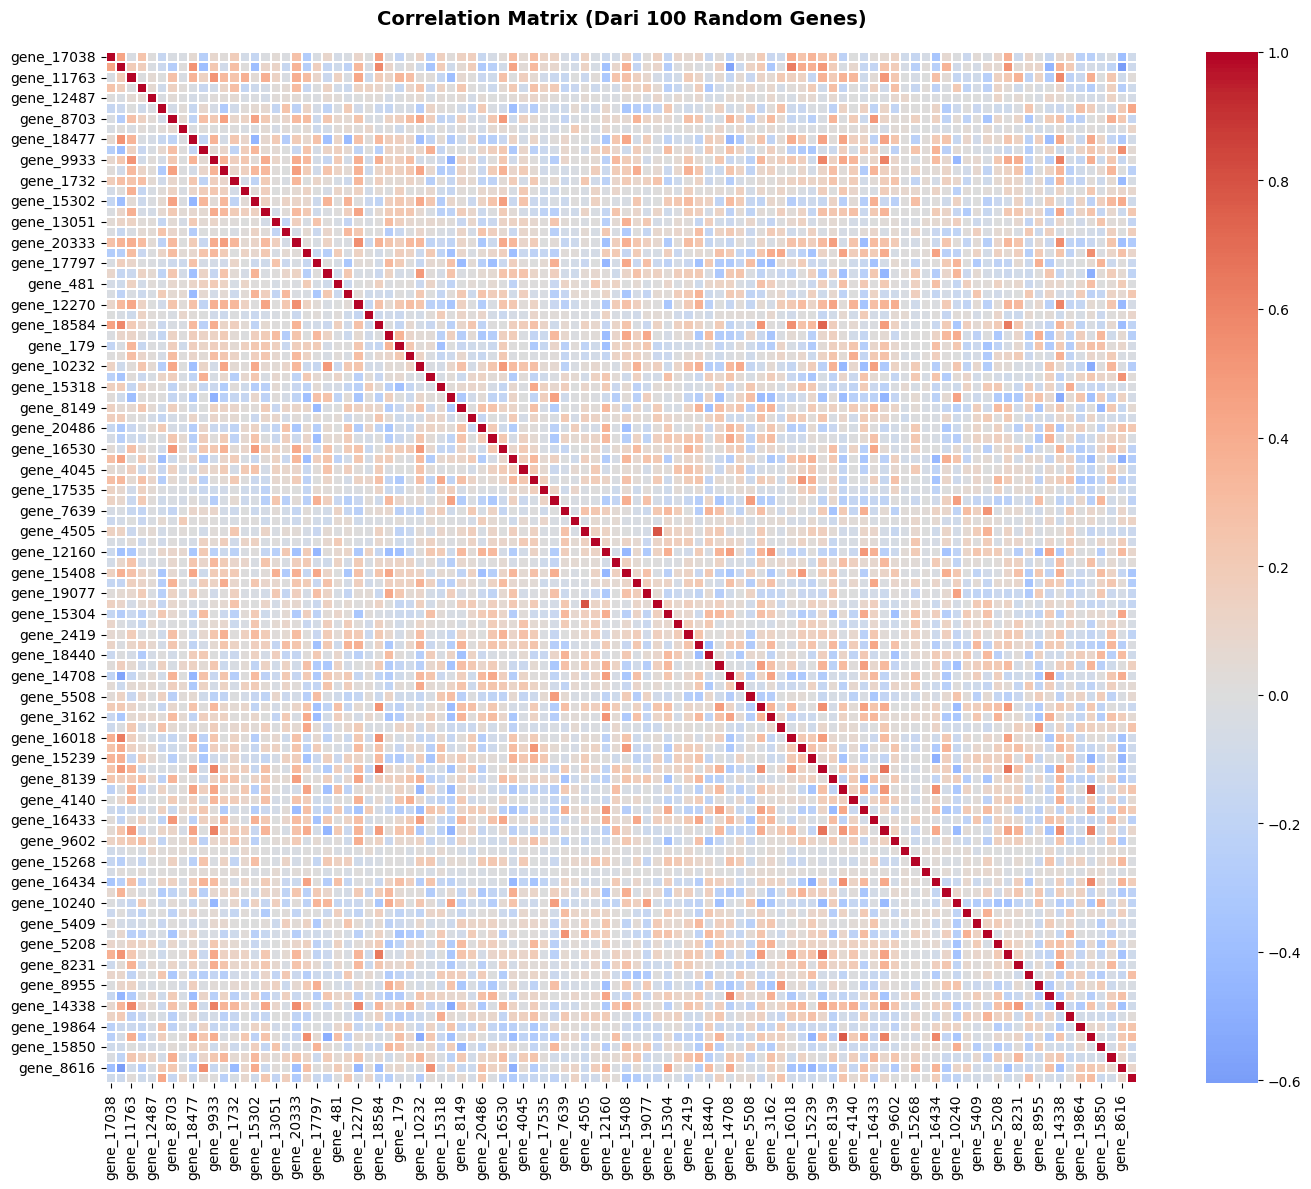

In [ ]:
sample_size = 100
sample_genes = np.random.choice(data.columns, sample_size, replace=False)
corr_matrix = data[sample_genes].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
            square=True, linewidths=0.1)
plt.title(f'Correlation Matrix (Dari {sample_size} Random Genes)',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('eda_5_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

###  Data Transformation - Log1p
Transformasi data RNA-Seq untuk mengurangi skewness dan outlier effect.

**Mengapa Log1p?**
- RNA-Seq data highly skewed (beberapa gen sangat tinggi ekspresinya)
- Log transformation membuat distribusi lebih normal



In [ ]:
data = np.log1p(data) # Transformasi logaritmik untuk mengurangi skewness
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42, stratify=target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 20531), (201, 20531), (600,), (201,))

###  Feature Scaling - StandardScaler
Standardisasi features agar memiliki mean=0 dan std=1.

In [ ]:
#scalling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#encode target
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Model Training - Logistic Regression

**Algoritma**: Logistic Regression (Linear Classifier)

Accuracy: 0.9933
Accuracy: 0.9900497512437811
Recall: 0.9842857142857143
Precision: 0.9916541353383458
F1 Score: 0.987833005846251
Confusion Matrix:
 [[75  0  0  0  0]
 [ 0 19  0  1  0]
 [ 0  0 37  0  0]
 [ 1  0  0 34  0]
 [ 0  0  0  0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        37
           3       0.97      0.97      0.97        35
           4       1.00      1.00      1.00        34

    accuracy                           0.99       201
   macro avg       0.99      0.98      0.99       201
weighted avg       0.99      0.99      0.99       201



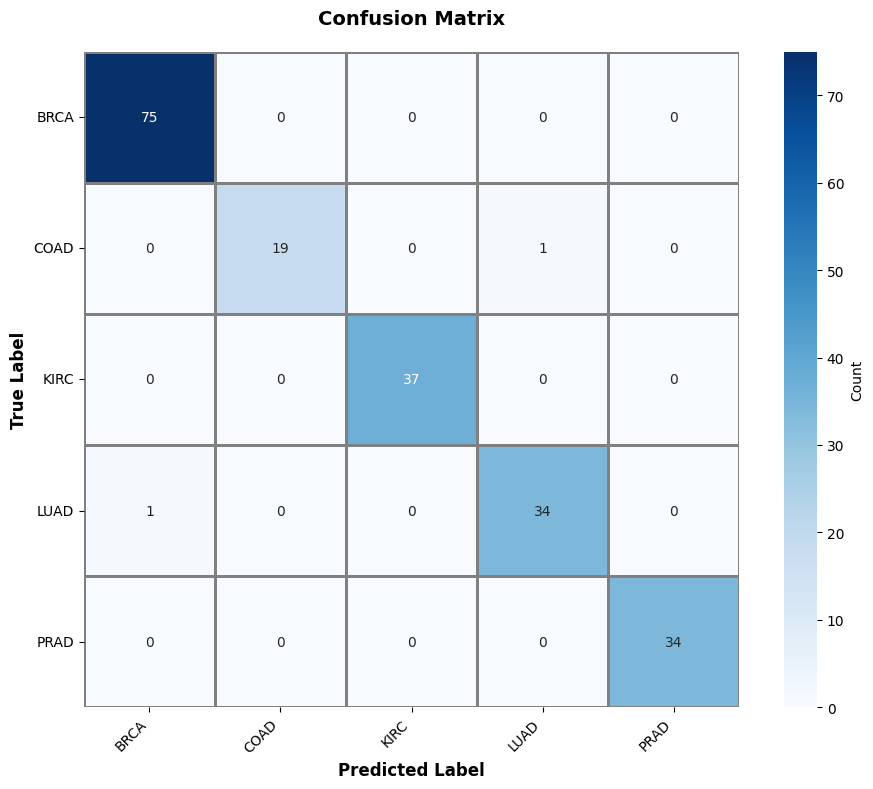

array([[75,  0,  0,  0,  0],
       [ 0, 19,  0,  1,  0],
       [ 0,  0, 37,  0,  0],
       [ 1,  0,  0, 34,  0],
       [ 0,  0,  0,  0, 34]])

In [ ]:
#k fold cross validation
model = LogisticRegression(max_iter=1000)
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
print(f"Accuracy: {scores.mean():.4f}")

# Training model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_confusion_matrix(y_test, y_pred, class_names=None, figsize=(10, 8), cmap='Blues'):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, 
                square=True, linewidths=1, linecolor='gray',
                cbar_kws={'label': 'Count'},
                ax=ax)
    
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold', pad=20)

    if class_names is not None:
        ax.set_xticklabels(class_names, rotation=45, ha='right')
        ax.set_yticklabels(class_names, rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    return cm

class_names = le.classes_
plot_confusion_matrix(y_test, y_pred, class_names=class_names)

Dari Confusion Matrix di atas dapat dilihat bahwa:
- BRCA: 75 → 75 benar, 0 salah
- COAD: 20 → 19 benar, 1 salah (diprediksi LUAD)
- KIRC: 37 → 37 benar, 0 salah
- LUAD: 35 → 34 benar, 1 salah (diprediksi BRCA)
- PRAD: 34 → 34 benar, 0 salah

### Model Training - Support Vector Classifier (SVC)

**Algoritma**: Support Vector Classifier (SVC)

Accuracy: 0.9850 
Accuracy: 0.9800995024875622
Recall: 0.9731660231660232
Precision: 0.9898734177215189
F1 Score: 0.981054910708416
Confusion Matrix:
 [[75  0  0  0  0]
 [ 1 19  0  0  0]
 [ 1  0 36  0  0]
 [ 2  0  0 33  0]
 [ 0  0  0  0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       1.00      0.95      0.97        20
           2       1.00      0.97      0.99        37
           3       1.00      0.94      0.97        35
           4       1.00      1.00      1.00        34

    accuracy                           0.98       201
   macro avg       0.99      0.97      0.98       201
weighted avg       0.98      0.98      0.98       201



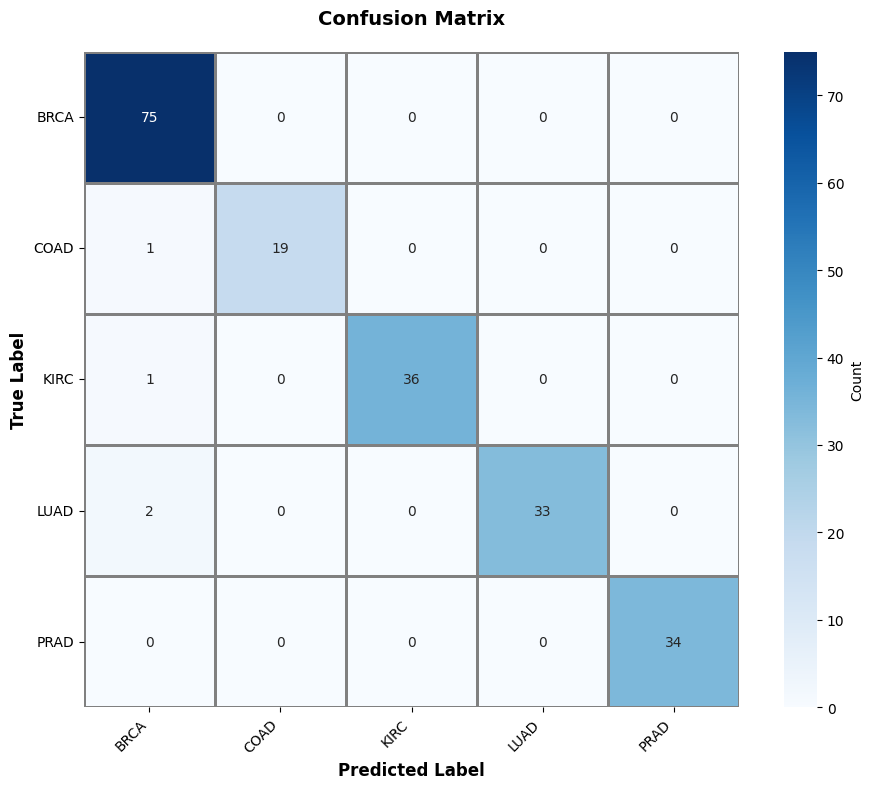

array([[75,  0,  0,  0,  0],
       [ 1, 19,  0,  0,  0],
       [ 1,  0, 36,  0,  0],
       [ 2,  0,  0, 33,  0],
       [ 0,  0,  0,  0, 34]])

In [ ]:
model_2 = SVC(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_2, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Accuracy: {scores.mean():.4f} ")

model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, class_names=class_names)

### Model Training Random Forest

**Algoritma**: Random Forest (Ensemble Learning)

Accuracy: 0.9983
Accuracy: 0.9850746268656716
Recall: 0.9831660231660232
Precision: 0.9923076923076923
F1 Score: 0.9874563524039754
Confusion Matrix:
 [[75  0  0  0  0]
 [ 0 20  0  0  0]
 [ 1  0 36  0  0]
 [ 2  0  0 33  0]
 [ 0  0  0  0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      1.00      1.00        20
           2       1.00      0.97      0.99        37
           3       1.00      0.94      0.97        35
           4       1.00      1.00      1.00        34

    accuracy                           0.99       201
   macro avg       0.99      0.98      0.99       201
weighted avg       0.99      0.99      0.99       201



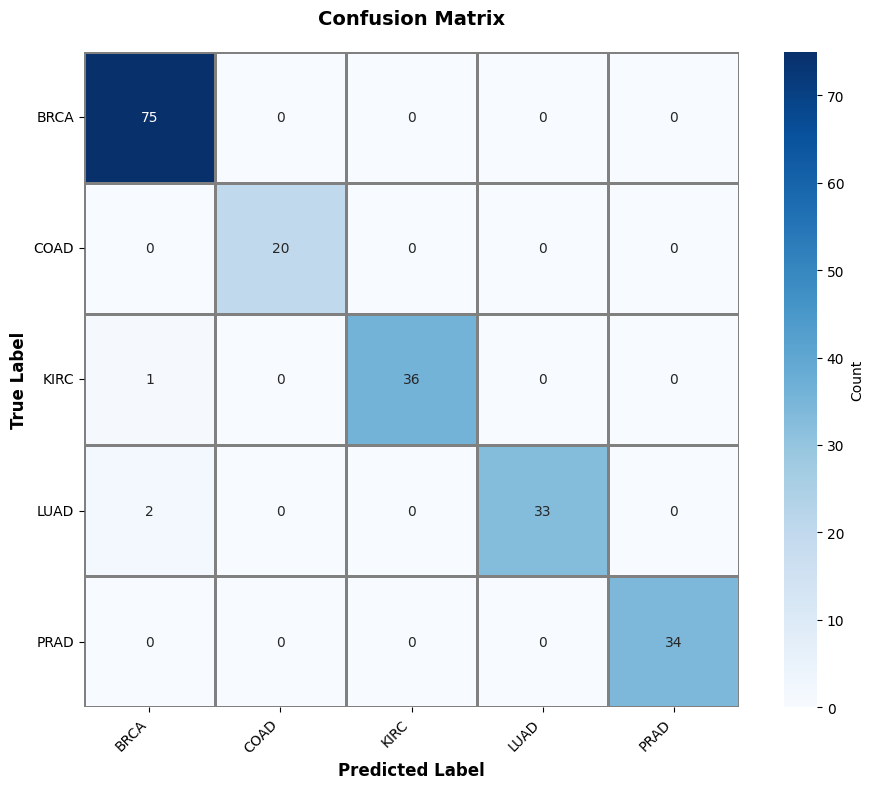

array([[75,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 1,  0, 36,  0,  0],
       [ 2,  0,  0, 33,  0],
       [ 0,  0,  0,  0, 34]])

In [ ]:
model_3 = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(model_3, X_train, y_train, cv=cv, scoring="accuracy")
print(f"Accuracy: {scores.mean():.4f}")

model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, class_names=class_names)

### Model Training - XGBoost

**Algoritma**: XGBoost (Extreme Gradient Boosting)



Accuracy: 0.9867
Accuracy: 0.9800995024875622
Recall: 0.9768067226890758
Precision: 0.9898734177215189
F1 Score: 0.9828622358034123
Confusion Matrix:
 [[75  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 37  0  0]
 [ 2  0  0 33  0]
 [ 2  0  0  0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        37
           3       1.00      0.94      0.97        35
           4       1.00      0.94      0.97        34

    accuracy                           0.98       201
   macro avg       0.99      0.98      0.98       201
weighted avg       0.98      0.98      0.98       201



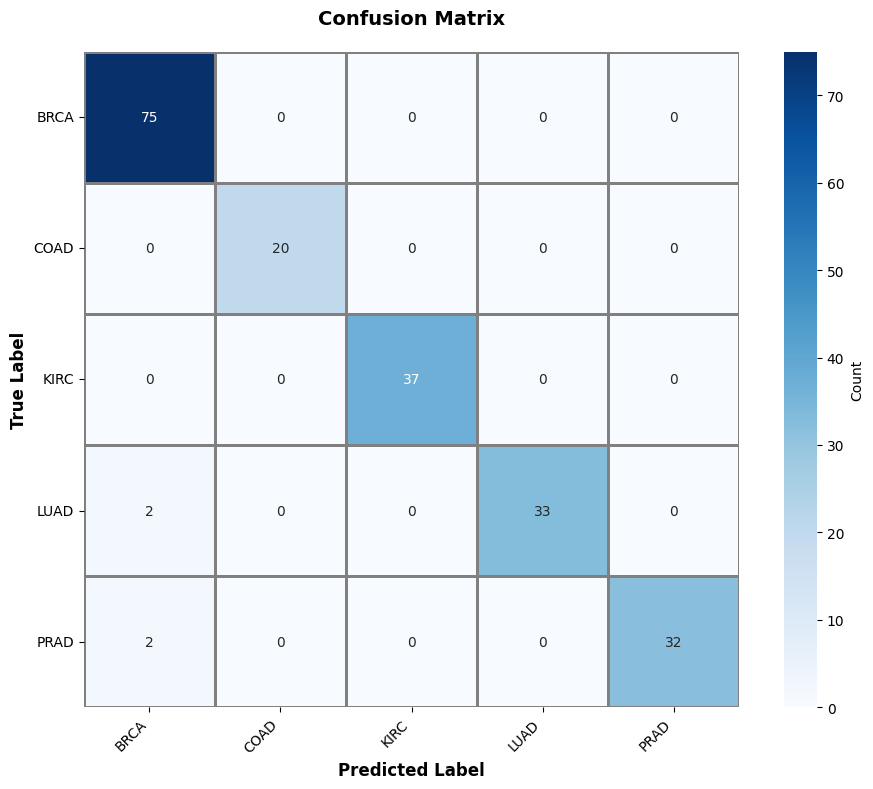

array([[75,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 0,  0, 37,  0,  0],
       [ 2,  0,  0, 33,  0],
       [ 2,  0,  0,  0, 32]])

In [ ]:
model_4 = XGBClassifier(eval_metric='logloss')

cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(model_4, X_train, y_train, cv=cv, scoring="accuracy")
print(f"Accuracy: {scores.mean():.4f}")

model_4.fit(X_train, y_train)
y_pred = model_4.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, class_names=class_names)

### Model Training - CatBoost

**Algoritma**: CatBoost (Categorical Boosting)

Accuracy: 0.9950
CatBoost Classifier
Accuracy: 0.9900497512437811
Recall: 0.9885714285714287
Precision: 0.9948051948051948
F1 Score: 0.991486068111455
Confusion Matrix:
 [[75  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 37  0  0]
 [ 2  0  0 33  0]
 [ 0  0  0  0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        37
           3       1.00      0.94      0.97        35
           4       1.00      1.00      1.00        34

    accuracy                           0.99       201
   macro avg       0.99      0.99      0.99       201
weighted avg       0.99      0.99      0.99       201



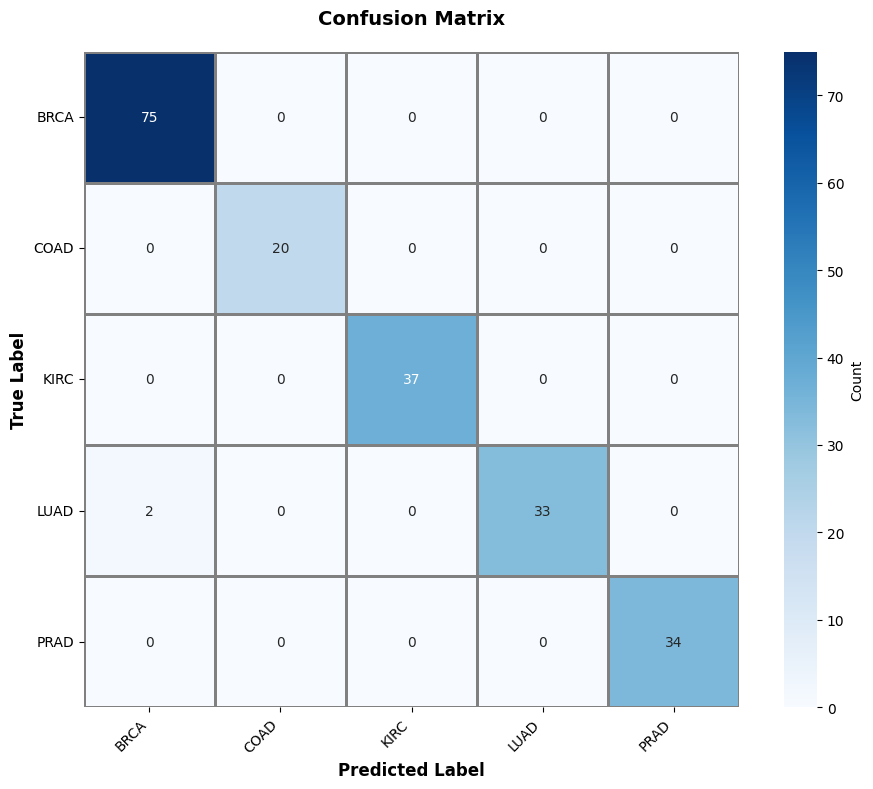

array([[75,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 0,  0, 37,  0,  0],
       [ 2,  0,  0, 33,  0],
       [ 0,  0,  0,  0, 34]])

In [ ]:
model_5 = CatBoostClassifier(
    iterations=100,
    depth=4,
    verbose=0,
    task_type='CPU',
    thread_count=2,
    random_seed=40
)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_5, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Accuracy: {scores.mean():.4f}")

# Training
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)

print("CatBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, class_names=class_names)


### Model Training - Multi-Layer Perceptron (MLP)

**Algoritma**: MLPClassifier (Neural Network)


Accuracy: 1.0000
MLP Classifier
Accuracy: 0.9850746268656716
Recall: 0.9742857142857144
Precision: 0.9862573099415204
F1 Score: 0.979698476673916
Confusion Matrix:
 [[75  0  0  0  0]
 [ 0 18  0  2  0]
 [ 0  0 37  0  0]
 [ 1  0  0 34  0]
 [ 0  0  0  0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.90      0.95        20
           2       1.00      1.00      1.00        37
           3       0.94      0.97      0.96        35
           4       1.00      1.00      1.00        34

    accuracy                           0.99       201
   macro avg       0.99      0.97      0.98       201
weighted avg       0.99      0.99      0.98       201



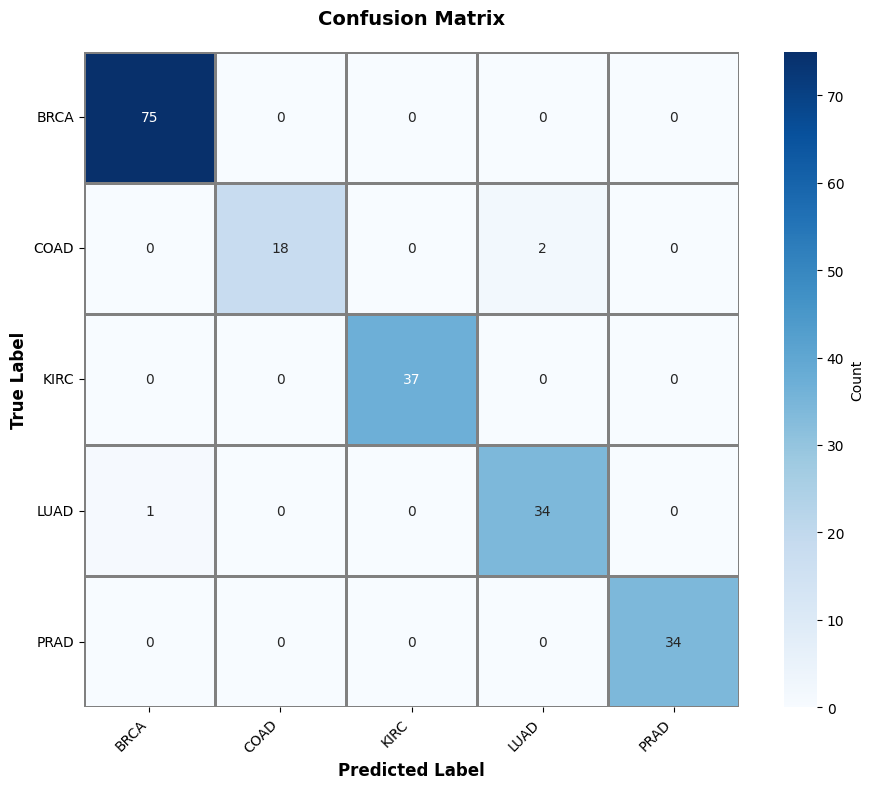

array([[75,  0,  0,  0,  0],
       [ 0, 18,  0,  2,  0],
       [ 0,  0, 37,  0,  0],
       [ 1,  0,  0, 34,  0],
       [ 0,  0,  0,  0, 34]])

In [ ]:
model_6 = MLPClassifier(max_iter=1000, random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_6, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Accuracy: {scores.mean():.4f}")


model_6.fit(X_train, y_train)
y_pred = model_6.predict(X_test)

print("MLP Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, class_names=class_names)

### 17. Model Training - Recurrent Neural Network (RNN)

**Algoritma**: SimpleRNN (Sequence Model)

Shape setelah reshape: (600, 20531, 1)


c:\Users\rayha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



=== Training RNN Model ===
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 229s 15s/step - accuracy: 0.4125 - loss: 1.4022 - val_accuracy: 0.6417 - val_loss: 0.9784
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 227s 15s/step - accuracy: 0.6562 - loss: 0.9340 - val_accuracy: 0.7917 - val_loss: 0.6787
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 233s 16s/step - accuracy: 0.7583 - loss: 0.7884 - val_accuracy: 0.8750 - val_loss: 0.5328
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 229s 15s/step - accuracy: 0.7812 - loss: 0.6816 - val_accuracy: 0.8750 - val_loss: 0.4761
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 231s 15s/step - accuracy: 0.7917 - loss: 0.6532 - val_accuracy: 0.8500 - val_loss: 0.5081
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 235s 16s/step - accuracy: 0.8417 - loss: 0.5421 - val_accuracy: 0.8583 - val_loss: 0.4107
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 259s 17s/step - accuracy: 0.8667 - loss: 0.5014 - val_accuracy: 0.8667 - val_loss: 0.4229
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 236s 16s/step - accuracy: 0.8750 - los

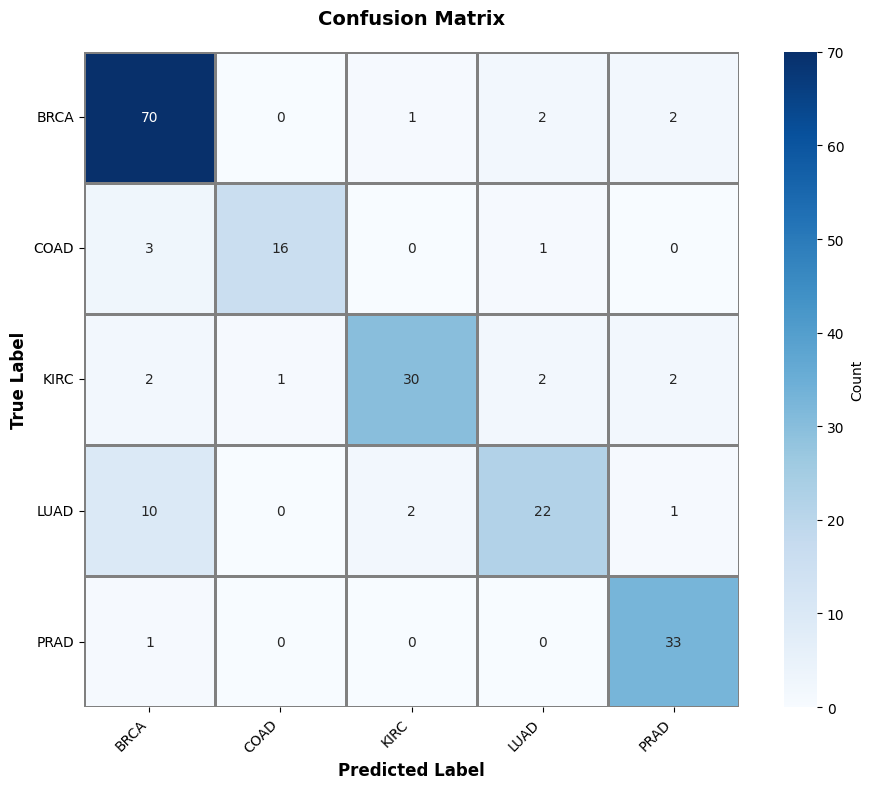

array([[70,  0,  1,  2,  2],
       [ 3, 16,  0,  1,  0],
       [ 2,  1, 30,  2,  2],
       [10,  0,  2, 22,  1],
       [ 1,  0,  0,  0, 33]])

In [ ]:
# Reshape untuk RNN (samples, timesteps, features)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# (n_samples, n_features, 1)
print(f"Shape setelah reshape: {X_train_rnn.shape}")

# Prepare categorical labels
num_classes = len(le.classes_)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Build RNN Model
model_7 = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(
        X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dropout(0.3),
    SimpleRNN(32),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model_7.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training
print("\n=== Training RNN Model ===")
history = model_7.fit(
    X_train_rnn, y_train_cat,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluation
test_loss, test_acc = model_7.evaluate(X_test_rnn, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predictions
y_pred_proba = model_7.predict(X_test_rnn)
y_pred = np.argmax(y_pred_proba, axis=1)

# Metrics
print("\n=== RNN Classifier Results ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, average='macro'):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

class_names = le.classes_
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

plot_confusion_matrix(y_test, y_pred, class_names=class_names)